<a href="https://colab.research.google.com/github/SiraDD/python_project/blob/main/python_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import relevant libraries and data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_html("https://github.com/SiraDD/python_project/blob/main/songs_normalize.csv")[0]
df=df.drop(columns="Unnamed: 0")

Clean up data

In [ ]:
# No null values in dataframe, no further steps needed
df.isnull().values.any()

False

In [ ]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
df.dtypes
df.shape

(2000, 21)

In [ ]:
df['genre']

0                    pop
1              rock, pop
2           pop, country
3            rock, metal
4                    pop
              ...       
1995                 pop
1996                 pop
1997    hip hop, country
1998                 pop
1999             hip hop
Name: genre, Length: 2000, dtype: object

In [ ]:
# Process genre
dct = {}
for i in range(0, len(df)):
  lst = df.loc[i]['genre'].split(',')
  lst = [i.strip() for i in lst]
  dct[df.loc[i]['genre']] = lst;

df['genre_list'] = df['genre'].map(dct)
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,genre_list,encoded_labels,Cluster
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,[pop],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop","[rock, pop]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country","[pop, country]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",1
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal","[rock, metal]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,[pop],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,...,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,[pop],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,...,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,[pop],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,...,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country","[hip hop, country]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",3
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,...,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,[pop],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


In [ ]:
df["genre_list"]

0                    [pop]
1              [rock, pop]
2           [pop, country]
3            [rock, metal]
4                    [pop]
               ...        
1995                 [pop]
1996                 [pop]
1997    [hip hop, country]
1998                 [pop]
1999             [hip hop]
Name: genre_list, Length: 2000, dtype: object

In [ ]:
df.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre_list           object
dtype: object

Data cleaning: remove years with not enough data points

In [ ]:
for year in df['year'].unique():
  print(year, df.loc[df['year']==year]['song'].count())

2000 74
1999 38
2001 108
2011 99
2002 90
2016 99
1998 1
2018 107
2004 96
2010 107
2015 99
2006 95
2008 97
2019 89
2003 97
2013 89
2005 104
2012 115
2020 3
2007 94
2009 84
2017 111
2014 104


In [ ]:
# Only count years that contain atleast 5 data values
# Remove 1998 and 2020
df = df.drop(df[df['year']==1998].index)
df = df.drop(df[df['year']==2020].index)

In [ ]:
df_per_year = df.groupby(['year']).mean()

In [ ]:
df_per_year

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
year,,,,,,,,,,,,,,
1999,253384.631579,0.210526,64.921053,0.668974,0.738421,5.131579,-5.936816,0.552632,0.067224,0.143688,0.009172,0.165600,0.574008,122.705000
2000,249993.067568,0.162162,58.554054,0.689824,0.748257,5.148649,-6.201378,0.540541,0.077557,0.118339,0.030429,0.180522,0.647973,112.927041
2001,242450.064815,0.212963,59.407407,0.674130,0.724631,5.240741,-5.879213,0.518519,0.107445,0.145060,0.021340,0.173669,0.661041,117.487074
2002,253549.077778,0.333333,62.400000,0.675244,0.722567,5.644444,-5.471333,0.511111,0.124220,0.144033,0.010083,0.192847,0.575156,113.280911
2003,236334.639175,0.237113,58.793814,0.664876,0.701485,5.268041,-5.797021,0.556701,0.117113,0.183556,0.038006,0.163170,0.607632,119.081402
2004,234039.843750,0.375000,58.427083,0.696833,0.734698,5.760417,-5.233708,0.541667,0.125802,0.113342,0.015842,0.179655,0.608881,114.768479
2005,236514.288462,0.278846,61.759615,0.672923,0.701048,5.000000,-5.928894,0.548077,0.127886,0.122955,0.018278,0.187566,0.553077,118.745683
2006,238148.400000,0.273684,57.389474,0.660863,0.705347,5.326316,-5.673337,0.663158,0.116444,0.119027,0.001916,0.197664,0.601274,114.581337
2007,231749.904255,0.234043,59.925532,0.630521,0.767149,5.500000,-4.994904,0.595745,0.109497,0.116893,0.012669,0.183622,0.559499,121.066968


Linear regression:
Negative correlation shown between the years and the length of the top song

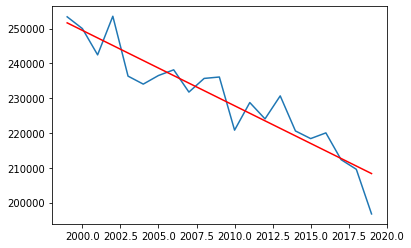

In [ ]:
params = np.polyfit(df_per_year.index, df_per_year["duration_ms"], deg=1)

xs = np.linspace(df_per_year.index.min(), df_per_year.index.max(), 1000)
ys = params[0]*xs + params[1]

plt.plot(df_per_year["duration_ms"])
plt.plot(xs, ys, color="red")

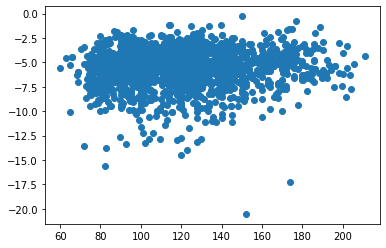

In [ ]:
plt.scatter(df['tempo'],df['loudness'])

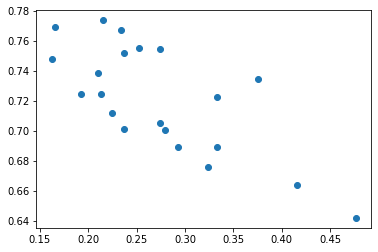

In [ ]:
plt.scatter(df_per_year['explicit'], df_per_year['energy'])

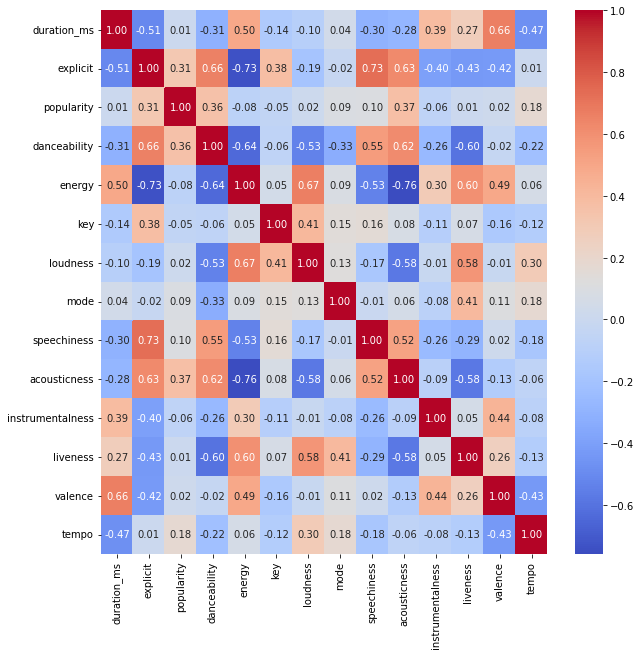

In [ ]:
import seaborn as sns
df_per_year.corr()
corr = df_per_year.corr()
figure = plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='0.2f')

Copied code from Lecture 4 (Clustering)

In [ ]:
all_genres = []
for genres in df["genre_list"]:
    all_genres += genres

print(set(all_genres))

{'jazz', 'Dance/Electronic', 'latin', 'pop', 'blues', 'country', 'classical', 'Folk/Acoustic', 'World/Traditional', 'metal', 'easy listening', 'hip hop', 'set()', 'R&B', 'rock'}


In [ ]:
genre_counts = {genre:all_genres.count(genre) for genre in set(all_genres)}
genre_counts

{'jazz': 2,
 'Dance/Electronic': 390,
 'latin': 64,
 'pop': 1630,
 'blues': 4,
 'country': 21,
 'classical': 1,
 'Folk/Acoustic': 20,
 'World/Traditional': 9,
 'metal': 66,
 'easy listening': 7,
 'hip hop': 775,
 'set()': 22,
 'R&B': 451,
 'rock': 234}

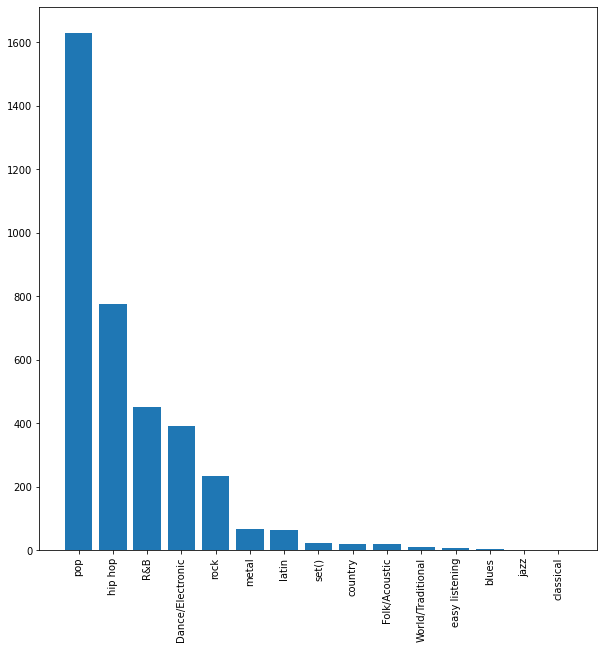

In [ ]:
genre_counts = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))
xs = list(range(len(genre_counts)))
plt.figure(figsize=(10,10))
plt.bar(xs, genre_counts.values())
plt.xticks(xs, labels=genre_counts.keys(), rotation=90)
plt.show()

In [ ]:
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,genre_list
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,[pop]
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop","[rock, pop]"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country","[pop, country]"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal","[rock, metal]"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,[pop]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,[pop]
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,[pop]
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country","[hip hop, country]"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,[pop]


In [ ]:
genres = sorted(genre_counts.keys())

def encode_labels(this_labels, all_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
    """
    out = np.zeros(len(all_labels))
    for label in this_labels:
        out[all_labels.index(label)] = 1
    return out

enocded_labels = []
for index, row in df.iterrows():
    enocded_labels.append(encode_labels(row["genre_list"], genres))

df["encoded_labels"] = enocded_labels

In [ ]:
df["encoded_labels"]

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
1995    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1996    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1997    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...
1998    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1999    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
Name: encoded_labels, Length: 2000, dtype: object

In [ ]:
df[["genre_list", "song"]]

,genre_list,song
0,[pop],Oops!...I Did It Again
1,"[rock, pop]",All The Small Things
2,"[pop, country]",Breathe
3,"[rock, metal]",It's My Life
4,[pop],Bye Bye Bye
...,...,...
1995,[pop],Sucker
1996,[pop],Cruel Summer
1997,"[hip hop, country]",The Git Up
1998,[pop],Dancing With A Stranger (with Normani)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8) # arbitrary choice for now
kmeans = kmeans.fit(df['encoded_labels'].tolist())

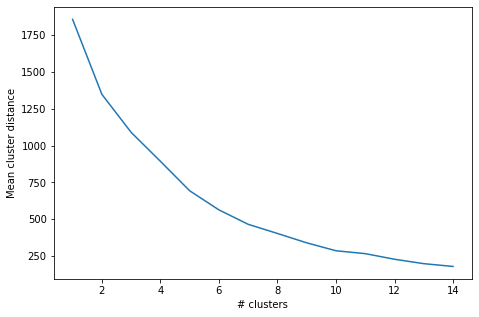

In [ ]:
distances = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(df['encoded_labels'].tolist())
    distances.append(kmeans.inertia_)

plt.figure(figsize=(7.5,5))
plt.ylabel("Mean cluster distance")
plt.xlabel("# clusters")

plt.plot(list(range(1,15)), distances)
plt.show()

In [ ]:
kmeans = KMeans(5)
kmeans.fit(df['encoded_labels'].tolist())
y_preds = kmeans.predict(df['encoded_labels'].tolist())
df["Cluster"] = y_preds

In [ ]:
df.loc[df["Cluster"]==4][["song", "genre_list"]].head()

,song,genre_list
3,It's My Life,"[rock, metal]"
20,In the End,"[rock, metal]"
21,Sexbomb,"[rock, Folk/Acoustic, easy listening]"
25,Take A Look Around,[metal]
59,Go Let It Out,"[Folk/Acoustic, rock]"
